In [2]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
## n_samples = datapoints, centers=k, n_features= column, more feature , hard to visualise the data, if we use features as 4, 5 , we can use PCA to reduce it to 2/3

X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[-0.01687473,  1.0948253 ],
       [ 6.1375281 ,  6.55702532],
       [ 8.6371825 ,  6.36947265],
       ...,
       [ 8.89348449,  2.13105799],
       [-0.08457925,  0.85191537],
       [-1.76572306,  2.40068796]])

In [5]:
y

## since we hv 3 features, y uses = 0,1,2

array([1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0,
       2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1,
       1, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 2,
       0, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1,
       2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2,
       0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1,
       0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1,
       2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2,
       2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       1, 0, 2, 1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0,

In [ ]:
## in supervised ml, we use both X and y for triaing BUT
## in unsupervised ml, we use just X

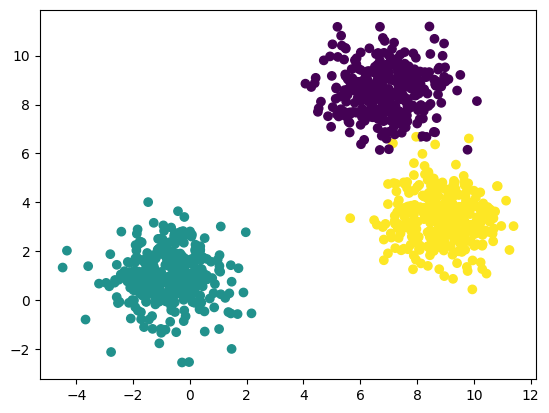

In [6]:
## considering clusters of 0,1,2 - for all rows; here colour =y
plt.scatter(X[:,0],X[:,1],c=y)

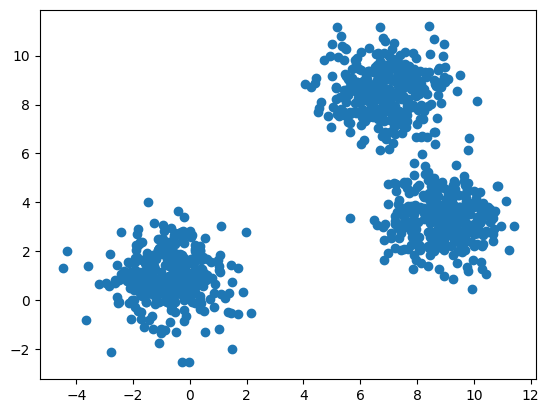

In [7]:
## but if
plt.scatter(X[:,0],X[:,1])


In [8]:
## performing standarisation- which is a feature scaling technique

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



In [9]:
## train, test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## we will not use y_train, y_test

In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
## Elbow method to select the kvalue, wcss= within cluster sum of squares; we will try with diff values of k from 1 to 11 and in loop

wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [13]:
wcss

## we will see wcss value keep on decreasing as k increases ( 1 to 11 ) i.e number of clusters increase, distance of internal cluster to centroid increase


[1340.0000000000002,
 393.1989028923964,
 99.3683569156865,
 86.16566123372432,
 73.65592275444114,
 62.1676732315517,
 55.62109269646864,
 49.820172959317176,
 43.82921413328669,
 39.853413505288266]

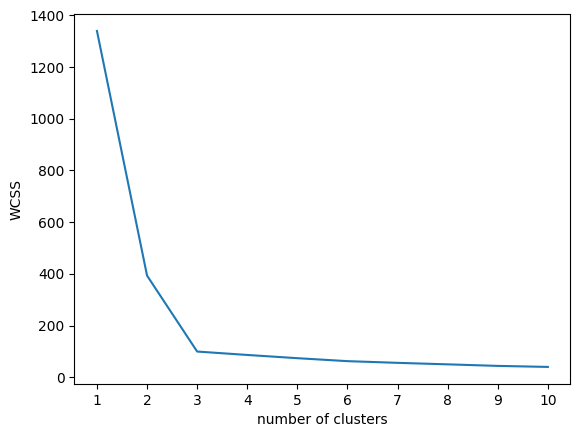

In [15]:
## how to determine appropriate value of k - plot elbow curve
## plot elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

## from L point of this elbow= we dtermine correct k; so K=3

In [21]:
## so lets create clusters based on k=3
kmeans=KMeans(n_clusters=3,init="k-means++")

In [22]:
## prediction can be done based on 3 centroids
kmeans.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2,
       2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2,
       1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 1,
       0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1,
       1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0,
       1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2,
       1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0,
       2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 1,
       1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1,

In [23]:
##
y_pred=kmeans.predict(X_test_scaled)

In [24]:
y_pred

array([0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0,
       0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0,
       1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0,
       2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1,
       2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0,

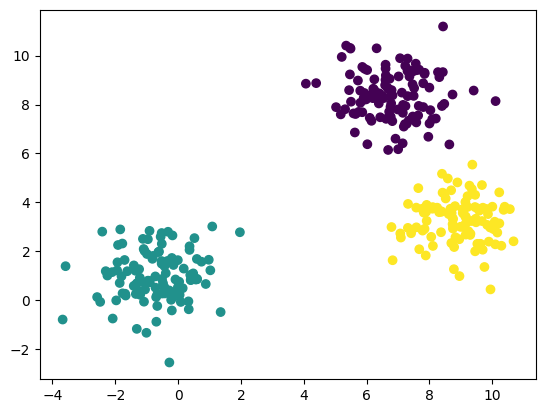

In [25]:
## plot both ;
## X= X_test ; y=y_pred
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [26]:
## Validating of k value by Elbow method is sometimes difficult also ( when large data)
## we have 2 more methods to do so:
## 1. knee locator
## 2. Silhoutee scoring


kneeLocator

In [27]:
##knee locator
!pip install kneed

In [28]:
from kneed import KneeLocator

In [31]:
## bydefault curve is concave, we will change to convex

kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [32]:
kl.elbow

3

Silhoutee scoring

In [34]:
## silhoutee scoring
from sklearn.metrics import silhouette_score

In [35]:
silhouette_coefficients=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  score=silhouette_score(X_train_scaled,kmeans.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [36]:
silhouette_coefficients

[0.6656138700542703,
 0.7328139694025652,
 0.5757818461960101,
 0.4426673891616987,
 0.3317884738237832,
 0.3420063495851862,
 0.337989309830074,
 0.3370222522224612,
 0.3406807610332316]

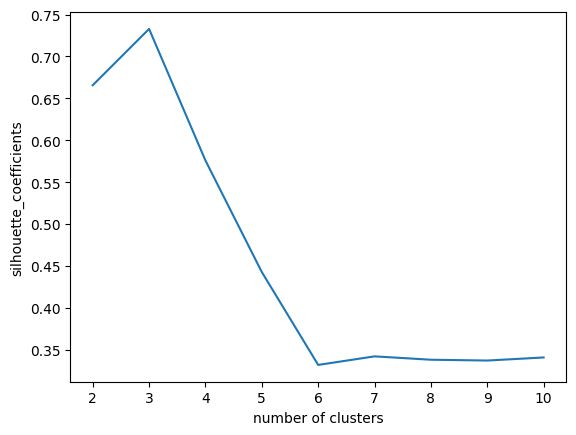

In [37]:
## plot
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

##where in plot, values are highest , we consider that as k, here k=3